In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn

In [3]:
def add_grid(axes):
    axes.grid(color='grey', linestyle='-', linewidth=0.5, which='major', axis ='both')
    axes.grid(color='lightblue', linestyle='-', linewidth=0.5, which='minor', axis ='both')
    axes.minorticks_on()
    
def plot_equal_values_line(ax, x_min = 0, x_max = 10000, quantity = 10000, color='grey'):
    x = np.linspace(x_min, x_max, quantity)
    return ax.plot(x, x, c=color, linestyle = '--', label = 'Линия равных значений')

def plot_error_percent_lines(ax, x_min = 0, x_max = 10000, quantity = 10000, color='grey', percentage = 10):
    x = np.linspace(x_min, x_max, quantity)
    y1 = x-x*percentage/100
    y2 = x+x*percentage/100
    return (ax.plot(x, y1, c=color, linestyle = '--', label = F'Ошибка -{percentage}%'), 
            ax.plot(x, y2, c=color, linestyle = '--', label = F'Ошибка +{percentage}%'))

In [4]:
file_physical_props = './X_bp.xlsx'
file_physical_props_sheet_name='X_bp.csv'
file_results = 'X_nup.xlsx'
file_results_sheet_name='X_nup.csv'

# Читаем данные и сшиваем их в одну таблицу

In [5]:
file_physical_props_df = pd.read_excel(io=file_physical_props,
                                         engine='openpyxl',
                                         sheet_name = file_physical_props_sheet_name)

In [6]:
file_results_df = pd.read_excel(io=file_results,
                                         engine='openpyxl',
                                         sheet_name = file_results_sheet_name)

In [7]:
file_physical_props_df.rename(columns={'Unnamed: 0': 'id_phis_props'}, inplace=True)
file_physical_props_df.head(5)

id_phis_props  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0              0                         1.857143            2030.0   
1              1                         1.857143            2030.0   
2              2                         1.857143            2030.0   
3              3                         1.857143            2030.0   
4              4                         2.771331            2030.0   

   модуль упругости, ГПа  Количество отвердителя, м.%  \
0             738.736842                        30.00   
1             738.736842                        50.00   
2             738.736842                        49.90   
3             738.736842                       129.00   
4             753.000000                       111.86   

   Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                        22.267857                100.000000   
1                        23.750000                284.615385   
2                        33.000000                284.615385   
3                        21.250000                300.000000   
4                        22.267857                284.615385   

   Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                          210.0                                  70.0   
1                          210.0                                  70.0   
2                          210.0                                  70.0   
3                          210.0                                  70.0   
4                          210.0                                  70.0   

   Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                         3000.0                    220.0  
1                         3000.0                    220.0  
2                         3000.0                    220.0  
3                         3000.0                    220.0  
4                         3000.0                    220.0

In [8]:
file_results_df.rename(columns={'Unnamed: 0': 'id_results'}, inplace=True)
file_results_df.head(5)

id_results  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0           0                   0          4.0               57.0
1           1                   0          4.0               60.0
2           2                   0          4.0               70.0
3           3                   0          5.0               47.0
4           4                   0          5.0               57.0

In [9]:
joined_df = file_results_df.join(file_physical_props_df, how='inner', lsuffix='id_results', rsuffix='id_phis_props')

In [10]:
joined_df.drop(columns = ['id_phis_props'], inplace=True)
joined_df.drop(columns = ['id_results'], inplace=True)
joined_df

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
0                      0     4.000000          57.000000   
1                      0     4.000000          60.000000   
2                      0     4.000000          70.000000   
3                      0     5.000000          47.000000   
4                      0     5.000000          57.000000   
...                  ...          ...                ...   
1018                  90     9.076380          47.019770   
1019                  90    10.565614          53.750790   
1020                  90     4.161154          67.629684   
1021                  90     6.313201          58.261074   
1022                  90     6.078902          77.434468   

      Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                       3000.000000               220.000000  

# Визуализируем даные в виде гистограмм и попарных сопоставлений

In [11]:
columns = joined_df.columns
print(columns)

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')


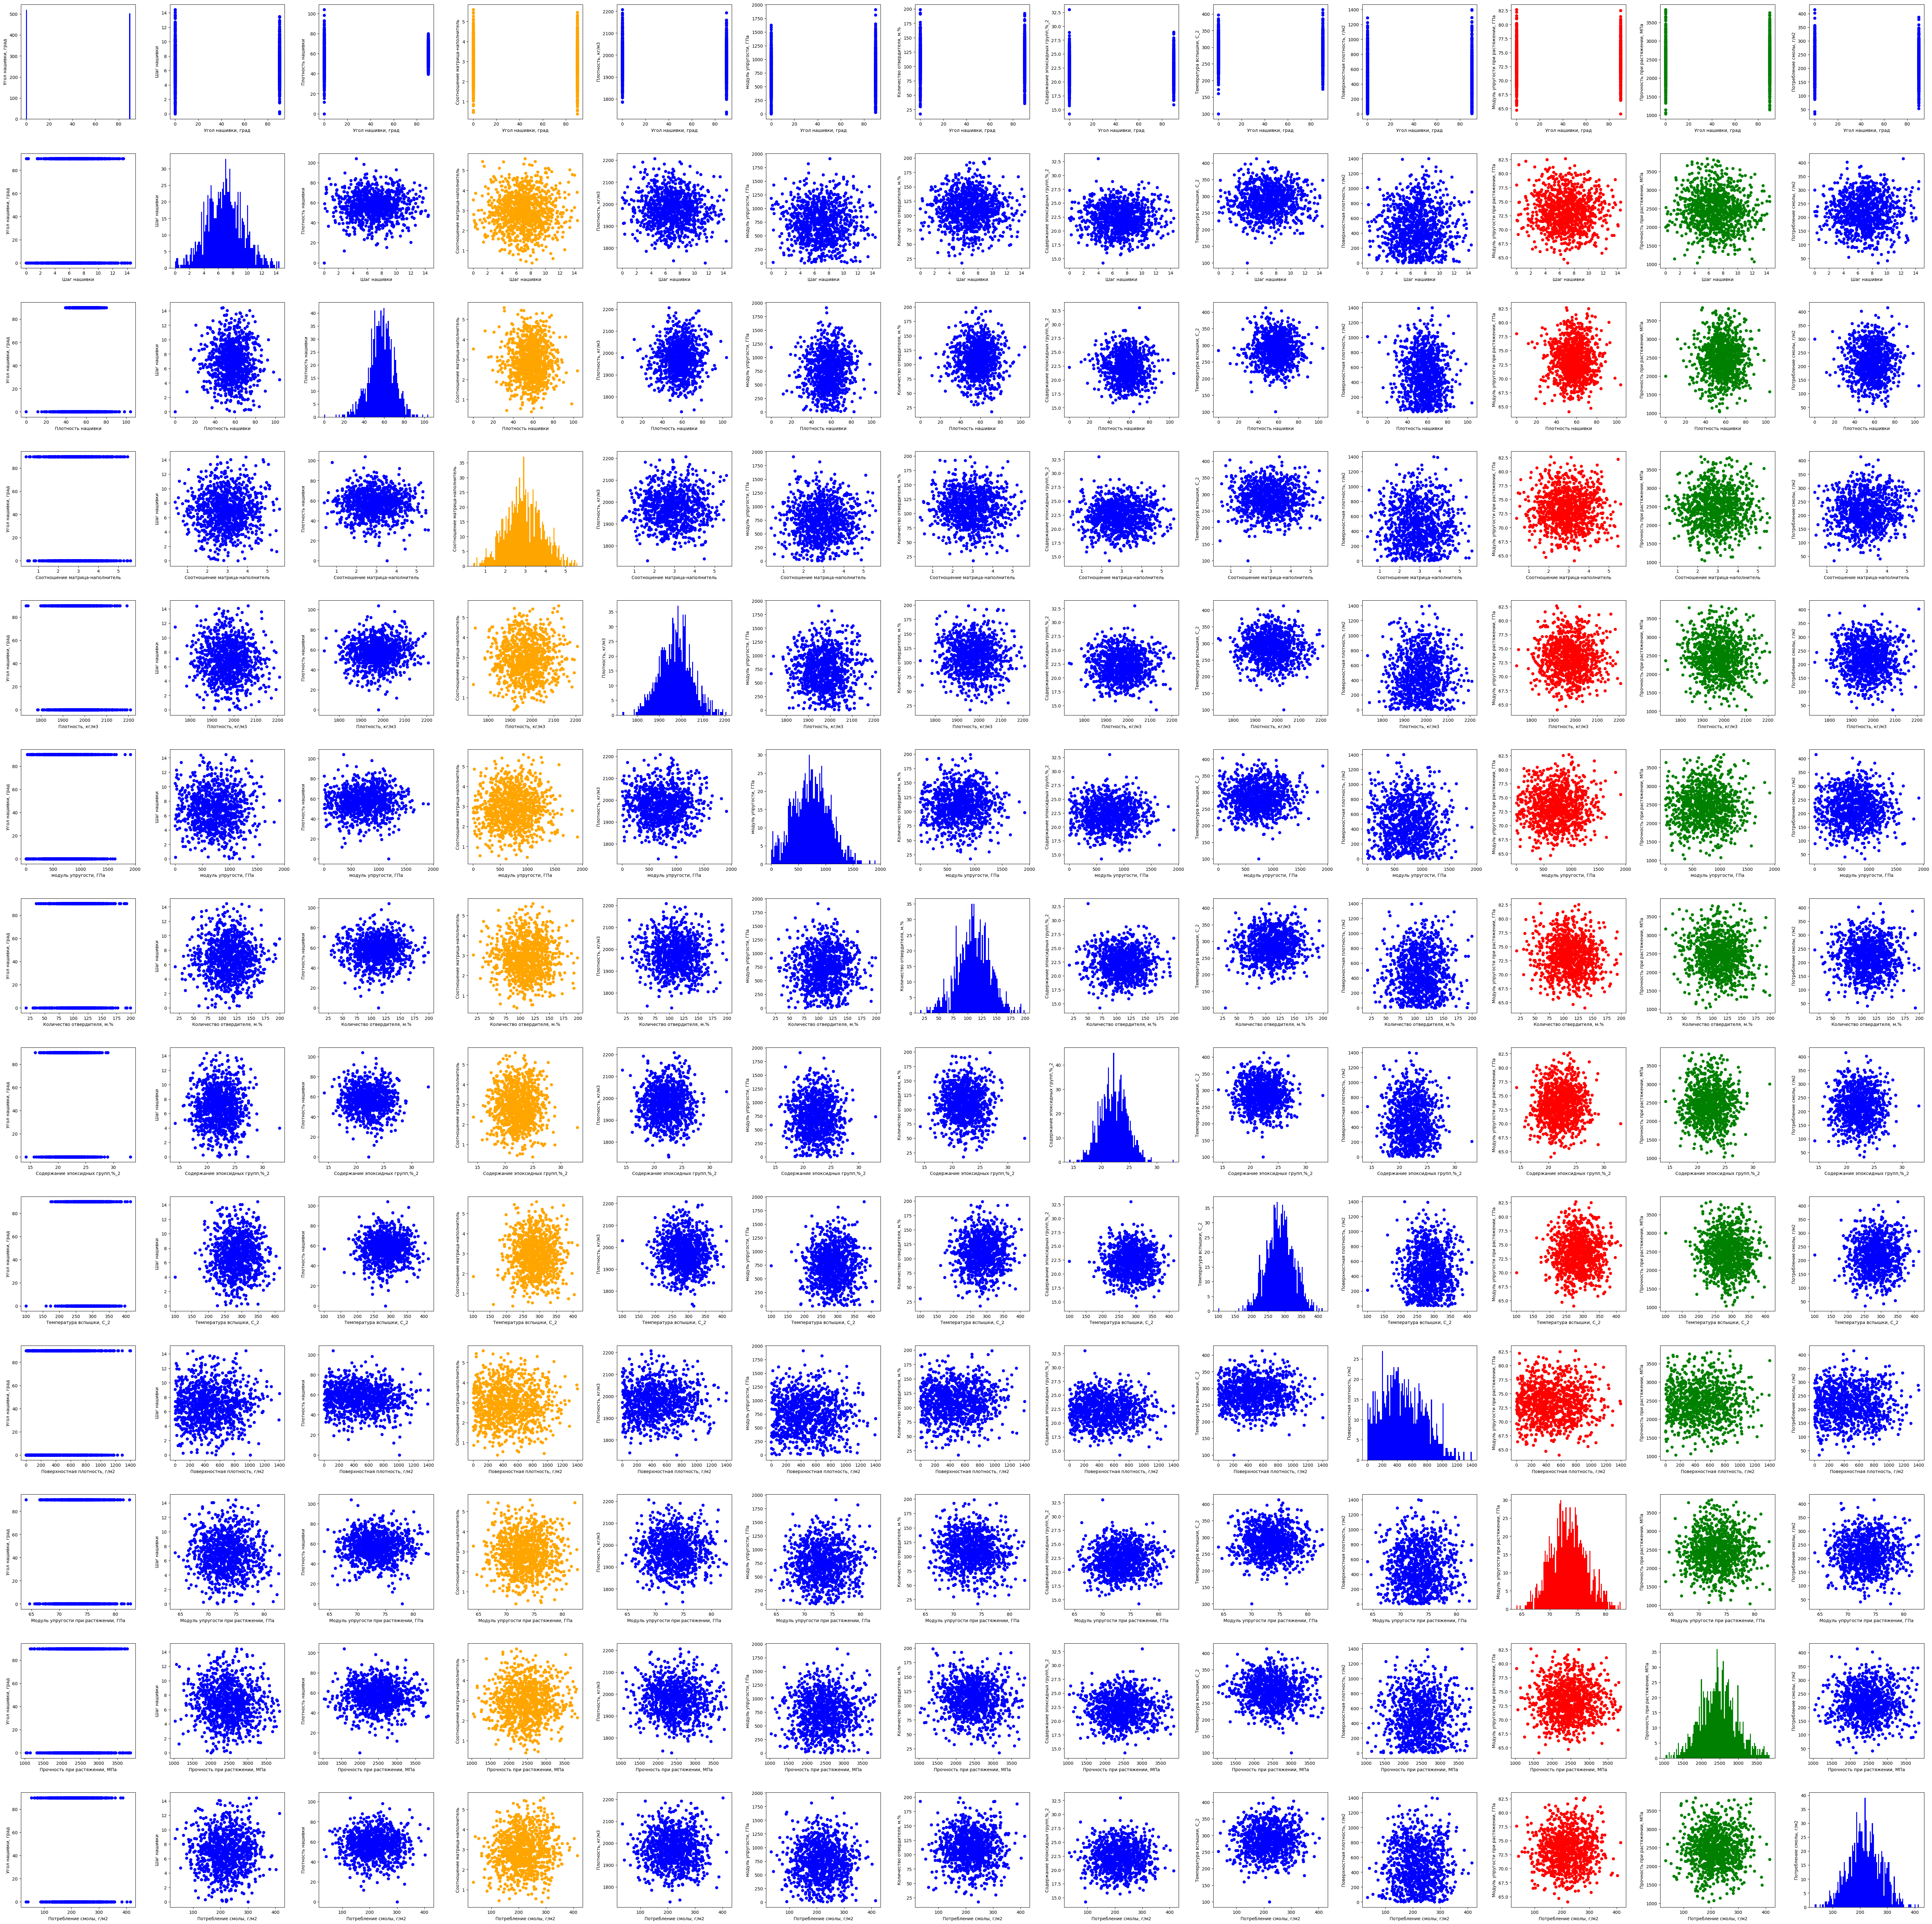

In [12]:
fig, ax = plt.subplots(len(columns),len(columns), figsize=(60,60))

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.3, hspace=0.3)

for x, column_x in enumerate(columns):
    for y, column_y in enumerate(columns):
        if column_y == 'Модуль упругости при растяжении, ГПа':
            color = 'red'
        elif column_y == 'Прочность при растяжении, МПа':
            color = 'green'
        elif column_y == 'Соотношение матрица-наполнитель':
            color = 'orange'
        else:
            color = 'blue'
        
        if column_x == column_y:
            ax[x, y].hist(joined_df[column_x], bins=100, color = color)    
            ax[x, y].set_ylabel(column_y) 
        else:
            ax[x, y].scatter(joined_df[column_x], joined_df[column_y], c = color)
            ax[x, y].set_xlabel(column_x)
            ax[x, y].set_ylabel(column_y)
plt.savefig('./descriptive_graphycs_first.pdf')

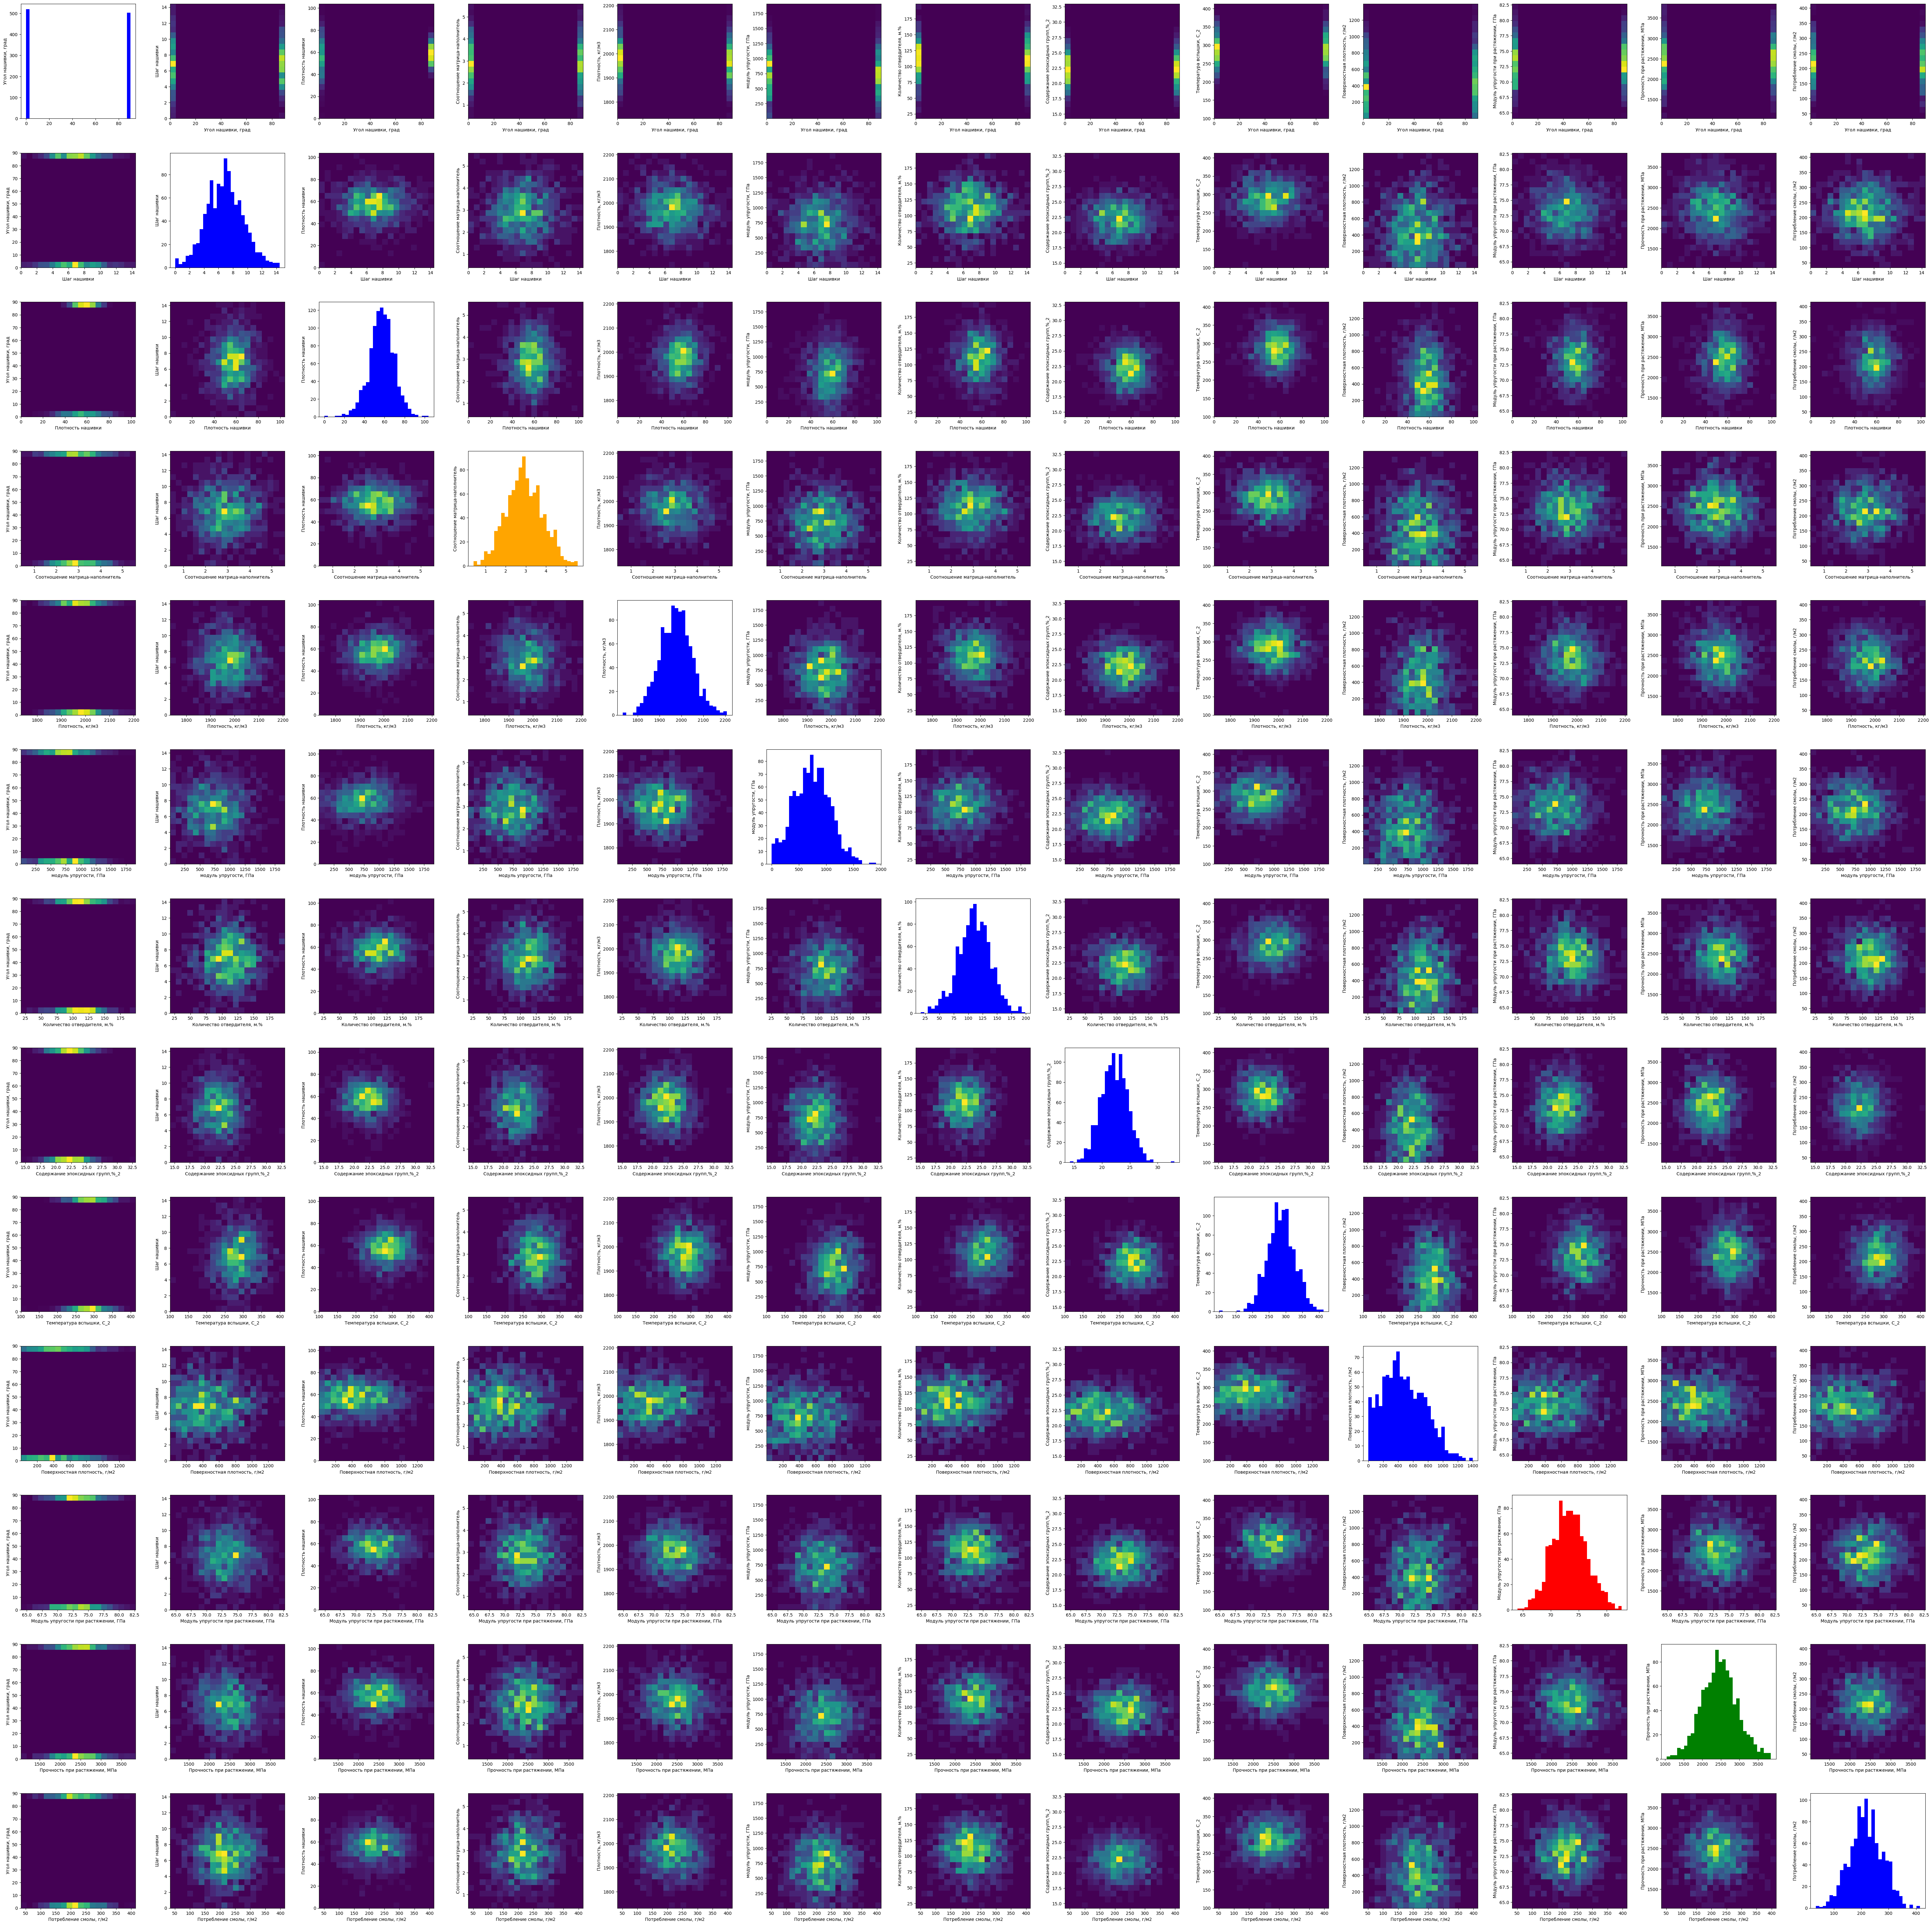

In [13]:
fig, ax = plt.subplots(len(columns),len(columns), figsize=(60,60))

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.3, hspace=0.3)

for x, column_x in enumerate(columns):
    for y, column_y in enumerate(columns):
        if column_y == 'Модуль упругости при растяжении, ГПа':
            color = 'red'
        elif column_y == 'Прочность при растяжении, МПа':
            color = 'green'
        elif column_y == 'Соотношение матрица-наполнитель':
            color = 'orange'
        else:
            color = 'blue'
        
        if column_x == column_y:
            ax[x, y].hist(joined_df[column_x], bins=30, color = color)    
            ax[x, y].set_ylabel(column_y) 
        else:
            ax[x, y].hist2d(joined_df[column_x], joined_df[column_y], 20)
            ax[x, y].set_xlabel(column_x)
            ax[x, y].set_ylabel(column_y)
plt.savefig('./descriptive_graphycs_second.pdf')

# Выбираем фичи и целевые показатели

In [14]:
joined_df.describe()

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
count         1023.000000  1023.000000        1023.000000   
mean            44.252199     6.899222          57.153929   
std             45.015793     2.563467          12.350969   
min              0.000000     0.000000           0.000000   
25%              0.000000     5.080033          49.799212   
50%              0.000000     6.916144          57.341920   
75%             90.000000     8.586293          64.944961   
max             90.000000    14.440522         103.988901   

       Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  
count                    1023.000000              1023.000000  
mean                     2466.922843               218.423144  
std                       485.628006                59.735931  
min                      1036.856605                33.803026  
25%                      2135.850448               179.627520  
50%                      2459.524526               219.198882  
75%                      2767.193119               257.481724  
max                      3848.436732               414.590628

In [15]:
def replace_to_nan(val):
    '''Function to remove self corelation indexes'''
    if val == 1:
        val = np.nan
    return val
    
# Для этого строим корреляционную матрицу
corr_matrix_df = joined_df.corr()

for column in corr_matrix_df.columns:
    corr_matrix_df[column] = list(map(lambda x: replace_to_nan(x), corr_matrix_df[column]))
    
corr_matrix_df.describe()

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
count           12.000000    12.000000          12.000000   
mean             0.013107    -0.000078           0.018450   
std              0.045203     0.033948           0.044972   
min             -0.068474    -0.061015          -0.049923   
25%             -0.017855    -0.014773           0.001452   
50%              0.021849     0.008441           0.011815   
75%              0.027355     0.024161           0.028789   
max              0.107947     0.038332           0.107947   

       Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                        12.000000         12.000000   
mean                          0.010566         -0.014872   
std                           0.027640          0.044293   
min                          -0.031073         -0.069981   
25%                          -0.006315         -0.042187   
50%                          -0.000405         -0.016769   
75%                           0.026036         -0.005248   
max                           0.072531          0.080304   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count              12.000000                    12.000000   
mean                0.012766                     0.005687   
std                 0.025195                     0.048355   
min                -0.025417                    -0.075375   
25%                -0.007515                    -0.013811   
50%                 0.012553                     0.011167   
75%                 0.031306                     0.027680   
max                 0.056346                     0.095193   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                        12.000000                 12.000000   
mean                          0.000115                  0.018811   
std                           0.024121                  0.034867   
min                          -0.039073                 -0.031763   
25%                          -0.010562                 -0.006025   
50%                          -0.003744                  0.020408   
75%                           0.009830                  0.029104   
max                           0.056828                  0.095193   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                      12.000000                             12.000000   
mean                        0.015469                              0.007934   
std                         0.031815                              0.035691   
min                        -0.049923                             -0.065929   
25%                        -0.005547                             -0.011157   
50%                         0.017906                              0.014740   
75%                         0.039981                              0.030486   
max                         0.055198                              0.056828   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  
count                      12.000000                12.000000  
mean                       -0.011264                 0.020544  
std                         0.040854                 0.027890  
min                        -0.075375                -0.015937  
25%                        -0.038709                 0.006044  
50%                        -0.006109                 0.014279  
75%                         0.023585                 0.034186  
max                         0.041868                 0.072531

In [16]:
key1 = ['Модуль упругости при растяжении, ГПа']
key2 = ['Прочность при растяжении, МПа']

In [17]:
# Коэффициенты парной корреляции между величинами
corr_matrix_df[key1[0]]

Угол нашивки, град                      0.023003
Шаг нашивки                            -0.029468
Плотность нашивки                       0.006476
Соотношение матрица-наполнитель        -0.008411
Плотность, кг/м3                       -0.017602
модуль упругости, ГПа                   0.023267
Количество отвердителя, м.%            -0.065929
Содержание эпоксидных групп,%_2         0.056828
Температура вспышки, С_2                0.028414
Поверхностная плотность, г/м2           0.036702
Модуль упругости при растяжении, ГПа         NaN
Прочность при растяжении, МПа          -0.009009
Потребление смолы, г/м2                 0.050938
Name: Модуль упругости при растяжении, ГПа, dtype: float64

In [18]:
# Коэффициенты парной корреляции между величинами
corr_matrix_df[key2[0]]

Угол нашивки, град                      0.023398
Шаг нашивки                            -0.059547
Плотность нашивки                       0.019604
Соотношение матрица-наполнитель         0.024148
Плотность, кг/м3                       -0.069981
модуль упругости, ГПа                   0.041868
Количество отвердителя, м.%            -0.075375
Содержание эпоксидных групп,%_2        -0.023899
Температура вспышки, С_2               -0.031763
Поверхностная плотность, г/м2          -0.003210
Модуль упругости при растяжении, ГПа   -0.009009
Прочность при растяжении, МПа                NaN
Потребление смолы, г/м2                 0.028602
Name: Прочность при растяжении, МПа, dtype: float64

# По корреляционным матрицам и визуально видим что какого то конкретного показателя влияющего на зависимые параметры не наблюдается поэтому для обучения используем все 11 независимых параметров

In [19]:
features1 = ['Угол нашивки, град',
             'Шаг нашивки',
             'Плотность нашивки',
             'Соотношение матрица-наполнитель',
             'Плотность, кг/м3',
             'модуль упругости, ГПа',
             'Количество отвердителя, м.%',
             'Содержание эпоксидных групп,%_2', 
             'Температура вспышки, С_2',
             'Поверхностная плотность, г/м2',
             'Потребление смолы, г/м2']

features2 = ['Угол нашивки, град',
             'Шаг нашивки',
             'Плотность нашивки',
             'Соотношение матрица-наполнитель',
             'Плотность, кг/м3',
             'модуль упругости, ГПа',
             'Количество отвердителя, м.%',
             'Содержание эпоксидных групп,%_2', 
             'Температура вспышки, С_2',
             'Поверхностная плотность, г/м2',
             'Потребление смолы, г/м2']

X1 = joined_df[features1].values
X2 = joined_df[features2].values
y1 = joined_df[key1].values
y2 = joined_df[key2].values

# Пишеим функции  1) для обучения и верификации 2) Для визуализации результатов

In [20]:
"""
models = [LinearRegression(), # метод наименьших квадратов
          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
          KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
          SVR(kernel='linear'), # метод опорных векторов с линейным ядром
          LogisticRegression() # логистическая регрессия
          MLPRegressor(random_state=1, max_iter=5555, hidden_layer_sizes = (120, 100, 50, 10)) нейронная сеть
"""

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error as RMSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score

def train_and_validate_model(X, y, model_type, neuron_model = (100)):
    # Разбиваем на обучающую и тестовую выборку
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.4)

    # Делайем плоскими входные данные так изначально они имеют размерность (y,1) преобразуем ее к (y,)
    y_test = y_test.ravel()
    y_train = y_train.ravel()
    
    if model_type != 'MLPRegressor':
       neuron_model = ''
    pass

    if model_type == 'MLPRegressor':
        model = MLPRegressor(random_state=1, max_iter=5000, hidden_layer_sizes = neuron_model)
    elif  model_type == 'LinearRegression':
        model = LinearRegression()
    elif model_type == 'RandomForestRegressor':
        model = RandomForestRegressor(n_estimators=100, max_features ='sqrt')
    elif model_type == 'KNeighborsRegressor':
        model =  KNeighborsRegressor(n_neighbors=5)
    elif model_type == 'SVR':
        model = SVR(kernel='linear')

    # Масштабируем входные данные
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Инициализируем модель и обучаем ее
    model.fit(X_train, y_train)

    # Делаем прогноз на тестовых данных
    y_pred = model.predict(X_test)

    # Считаем метрики модели
    r2_score_model = r2_score(y_test, y_pred)
    RMSE_model = RMSE(y_test, y_pred)
    MAE_model = MAE(y_test, y_pred)
    
    
    return {'model': model,
            'model_type': model_type,
            'neuron_struct': neuron_model,
            'scaler': sc,
            'r2_score': r2_score_model,
            'RMSE': RMSE_model,
            'MAE': MAE_model,
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test,
            'y_pred': y_pred}

def linear_function_x_on_y(ax, x_limit=[0, 1], a=0, b=0, color = 'black', legend = 'linear', linestyle = '-', linewidth = 1):
    x = np.linspace(x_limit[0], x_limit[1])
    y=a*x+b
    ax.plot(x, y, c=color, label = F'{legend}')

def show_model_performance(model_data, y_test, y_pred, range_val, color, title):

    fig, ax = plt.subplots(1, 2, figsize=(14,7))

    t_ax = ax[0]
    t_ax.scatter(y_test, y_pred, c=color, label=title)
    t_ax.set_title(title)
    t_ax.set_xlabel('Тестовая выборка')
    t_ax.set_ylabel('Предсказаннный')
    t_ax.set_xlim(range_val[0], range_val[1])
    t_ax.set_ylim(range_val[0], range_val[1])
    t_ax.text(range_val[1]-(range_val[1]-range_val[0])*0.8,
              range_val[0]+(range_val[1]-range_val[0])*0.8,
              f"{model_data['model_type']}\n{model_data['neuron_struct']}\nR^2={model_data['r2_score'].round(3)}\nRMSE={model_data['RMSE'].round(3)}\nMAE={model_data['MAE'].round(3)}")

    plot_equal_values_line(t_ax)
    plot_error_percent_lines(t_ax, percentage = 5, color = 'grey')
    plot_error_percent_lines(t_ax, percentage = 10, color = 'lavender')
    plot_error_percent_lines(t_ax, percentage = 20, color = 'coral')

    add_grid(t_ax)
    t_ax.legend(loc = 'lower left')
     
    t_ax = ax[1]
    hist2d = t_ax.hist2d(y_test, y_pred, 30)
    t_ax.set_xlim(range_val[0], range_val[1])
    t_ax.set_ylim(range_val[0], range_val[1])
    t_ax.set_xlabel('Тестовая выборка')
    t_ax.set_ylabel('Предсказаннный')
    plot_equal_values_line(t_ax, color='red')
    plot_error_percent_lines(t_ax, percentage = 5, color = 'grey')
    plot_error_percent_lines(t_ax, percentage = 10, color = 'lavender')
    plot_error_percent_lines(t_ax, percentage = 20, color = 'coral')
    add_grid(t_ax)
    t_ax.legend(loc = 'lower left')
    
    plt.savefig(f'./results_{model_data["model_type"]}_{model_data["neuron_struct"]}_model_for_{title}_.pdf')


# Готовим функцции и делаем расчет нескольких моделей для сопоставления их метрик (метрики выводятся внизу) Выбираем метрики с наименьшей ошибкой это нейронка с 300 нейронами в скрытом слое

In [21]:
def append_results(model_data, models_performance):
    models_performance[0].append(model_data['model_type'])
    models_performance[1].append(model_data['r2_score'].round(3))    
    models_performance[2].append(model_data['RMSE'].round(3))
    models_performance[3].append(model_data['MAE'].round(3))
    models_performance[4].append(model_data)

def print_results(models_performance):
    for i in range(len(models_performance[0])):
        print(f'name = {models_performance[0][i]}; neuron_struct = {models_performance[4][i]["neuron_struct"]}; r2_score={models_performance[1][i]}; RMSE={models_performance[2][i]}; MAE={models_performance[3][i]}')
   
R2_SCORE_list = []
RMSE_list = []
MAE_list = []
name_list = []
models = []
models_performance = [name_list, R2_SCORE_list, RMSE_list, MAE_list, models]


models = ['MLPRegressor', 'LinearRegression', 'SVR', 'KNeighborsRegressor', 'RandomForestRegressor']
neuron_models = [(64),
                 (100),
                 (200),
                 (300),
                 (400),
                 (500),
                 (700),
                 (1000),
                 (1500)]

for model in models:
     if model  != 'MLPRegressor':
         model_data = train_and_validate_model(X1, y1, model_type=model)
         append_results(model_data, models_performance)
     else:
        for neuron_struct in neuron_models:
            model_data = train_and_validate_model(X1, y1, model_type=model, neuron_model = neuron_struct)
            append_results(model_data, models_performance)
            
print_results(models_performance)

name = MLPRegressor; neuron_struct = 64; r2_score=-0.628; RMSE=16.437; MAE=3.195
name = MLPRegressor; neuron_struct = 100; r2_score=-0.505; RMSE=15.191; MAE=3.082
name = MLPRegressor; neuron_struct = 200; r2_score=-0.494; RMSE=15.079; MAE=3.09
name = MLPRegressor; neuron_struct = 300; r2_score=-0.367; RMSE=13.8; MAE=2.954
name = MLPRegressor; neuron_struct = 400; r2_score=-0.416; RMSE=14.295; MAE=3.004
name = MLPRegressor; neuron_struct = 500; r2_score=-0.412; RMSE=14.258; MAE=3.003
name = MLPRegressor; neuron_struct = 700; r2_score=-0.388; RMSE=14.007; MAE=2.984
name = MLPRegressor; neuron_struct = 1000; r2_score=-0.356; RMSE=13.688; MAE=2.942
name = MLPRegressor; neuron_struct = 1500; r2_score=-0.381; RMSE=13.937; MAE=2.956
name = LinearRegression; neuron_struct = ; r2_score=-0.009; RMSE=10.187; MAE=2.561
name = SVR; neuron_struct = ; r2_score=-0.013; RMSE=10.225; MAE=2.567
name = KNeighborsRegressor; neuron_struct = ; r2_score=-0.224; RMSE=12.358; MAE=2.806
name = RandomForestRegres

# Визуализируем результат и видим что метрики неочень то врут модель хоть и сидит на центральной линии, но судя по R2 имеет предсказательные показателти хуже чем среднее по выборке, следует отметить что другие модели имеют минимальную дисперсию Y, что еще хуже для прогноза

In [ ]:
# plot_data = True
    
if plot_data == True:
    model_data = models_performance[4][3]
    show_model_performance(model_data,
                           model_data['y_test'],
                           model_data['y_pred'],
                           range_val = (60, 85),
                           color = 'red',
                           title = 'Модуль упругости при растяжении, ГПа')

# По тем же функциям что приготовили выше делаем расчет для второго показателя для нескольких моделей в этом случае наиболее оптимальный вариант достигается при 64 нейронах в скрытом слое

In [23]:
R2_SCORE_list = []
RMSE_list = []
MAE_list = []
name_list = []
models = []
models_performance = [name_list, R2_SCORE_list, RMSE_list, MAE_list, models]


models = ['MLPRegressor', 'LinearRegression', 'SVR', 'KNeighborsRegressor', 'RandomForestRegressor']
neuron_models = [(12),
                 (32),
                 (64),
                 (100),
                 (200),
                 (300),
                 (400),
                 (500),
                 (700),
                 (1000),
                 (1500)]

for model in models:
     if model  != 'MLPRegressor':
         model_data = train_and_validate_model(X2, y2, model_type=model)
         append_results(model_data, models_performance)
     else:
        for neuron_struct in neuron_models:
            model_data = train_and_validate_model(X2, y2, model_type=model, neuron_model = neuron_struct)
            append_results(model_data, models_performance)
            
print_results(models_performance)

C:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


name = MLPRegressor; neuron_struct = 12; r2_score=-0.685; RMSE=412785.243; MAE=507.559
name = MLPRegressor; neuron_struct = 32; r2_score=-0.176; RMSE=287947.844; MAE=422.304
name = MLPRegressor; neuron_struct = 64; r2_score=-0.121; RMSE=274573.846; MAE=412.227
name = MLPRegressor; neuron_struct = 100; r2_score=-0.136; RMSE=278256.258; MAE=414.542
name = MLPRegressor; neuron_struct = 200; r2_score=-0.161; RMSE=284346.304; MAE=420.559
name = MLPRegressor; neuron_struct = 300; r2_score=-0.152; RMSE=282131.862; MAE=418.396
name = MLPRegressor; neuron_struct = 400; r2_score=-0.137; RMSE=278573.79; MAE=414.769
name = MLPRegressor; neuron_struct = 500; r2_score=-0.137; RMSE=278533.673; MAE=414.472
name = MLPRegressor; neuron_struct = 700; r2_score=-0.139; RMSE=278845.872; MAE=416.49
name = MLPRegressor; neuron_struct = 1000; r2_score=-0.153; RMSE=282331.525; MAE=418.443
name = MLPRegressor; neuron_struct = 1500; r2_score=-0.146; RMSE=280663.573; MAE=416.42
name = LinearRegression; neuron_stru

# Визуализируем второй результат, тут дело обстоит еще хуже чем в первом случае, опять же все разлетается вокруг линии равных значчений и на карте частот видно, что наибольшая плотность точек в центральной части. Но следует констатировать что модель плохо описывает данные

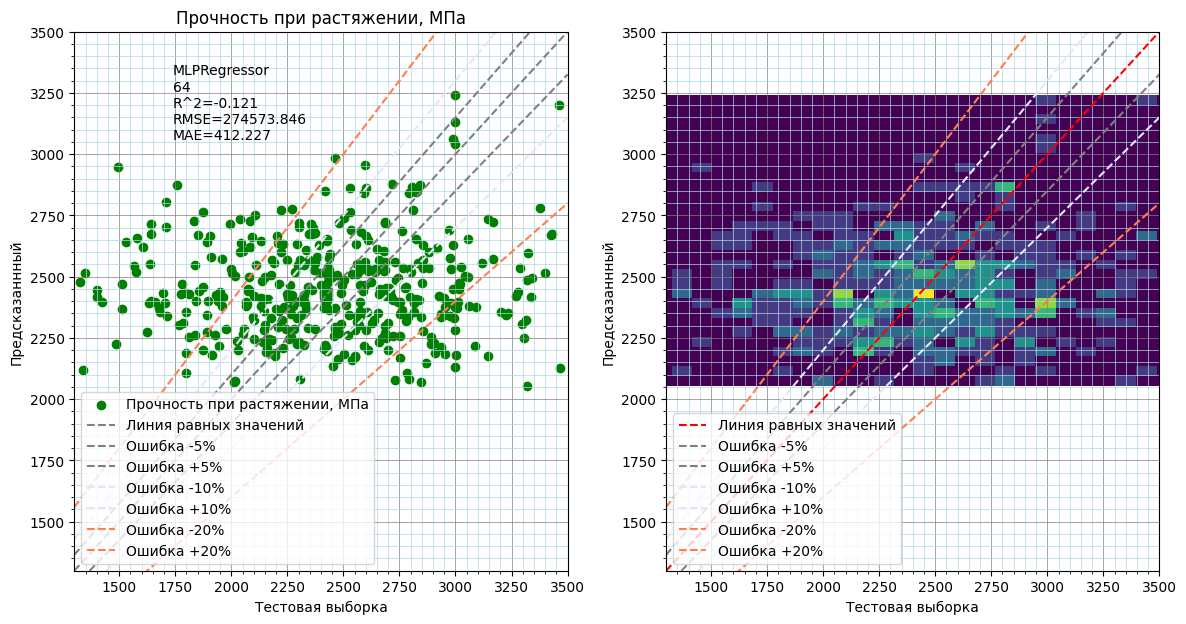

In [30]:
if plot_data == True:
    model_data = models_performance[4][2]
    show_model_performance(model_data,
                           model_data['y_test'],
                           model_data['y_pred'],
                           range_val = (1300, 3500),
                           color = 'green',
                           title = 'Прочность при растяжении, МПа')
else:
    pass

# Готовим входные данные все данные для консольного скрипта

In [25]:
text = ''

string = ''
for feature in features1:
    if string == '':
        string += str(feature)
    else:
        string += ';'+str(feature)
        
text += string+'\n'
    
for x in X1:
    string = ''
    for y in x:
        if string == '':
            string += str(y)
        else:
            string += ';'+str(y)
    text += string+'\n'
    
print(text)
    
file = './data_to_process.csv'

with open(file, 'w', encoding='utf-8') as f:
    f.write(text)

Угол нашивки, град;Шаг нашивки;Плотность нашивки;Соотношение матрица-наполнитель;Плотность, кг/м3;модуль упругости, ГПа;Количество отвердителя, м.%;Содержание эпоксидных групп,%_2;Температура вспышки, С_2;Поверхностная плотность, г/м2;Потребление смолы, г/м2
0.0;4.0;57.0;1.85714285714285;2030.0;738.736842105263;30.0;22.2678571428571;100.0;210.0;220.0
0.0;4.0;60.0;1.85714285714285;2030.0;738.736842105263;50.0;23.75;284.615384615384;210.0;220.0
0.0;4.0;70.0;1.85714285714285;2030.0;738.736842105263;49.9;33.0;284.615384615384;210.0;220.0
0.0;5.0;47.0;1.85714285714285;2030.0;738.736842105263;129.0;21.25;300.0;210.0;220.0
0.0;5.0;57.0;2.77133105802047;2030.0;753.0;111.86;22.2678571428571;284.615384615384;210.0;220.0
0.0;5.0;60.0;2.7679180887372;2000.0;748.0;111.86;22.2678571428571;284.615384615384;210.0;220.0
0.0;5.0;70.0;2.56962025316455;1910.0;807.0;111.86;22.2678571428571;284.615384615384;210.0;220.0
0.0;7.0;47.0;2.56147540983606;1900.0;535.0;111.86;22.2678571428571;284.615384615384;380.0

# Имитируя работу скрипта подгружаем данные независимых 11 переменных и вытаскиваем нужную модель из обученных, проводим расчет, затем выводим результат

In [27]:
df = pd.read_csv(file, sep=';', engine='python')
model_data = models_performance[4][7]
X = df.values

In [28]:
X = model_data['scaler'].transform(X)
y_pred = model_data['model'].predict(X)

for y in y_pred:
    print(y)

3383.495156883374
2512.971578439291
3214.7705228040463
2294.6772159527645
2142.735972867553
2164.301133346413
2367.060011164362
2371.6591884068985
2214.0802233661857
2498.8237317703797
2556.8906184446696
2361.685783503013
2185.5864437071855
2009.9957799966066
2179.8382640334376
2190.3616572073656
2266.1881439115587
2270.993163211417
2421.0827719569934
2738.3484300907876
2733.8824384678096
2368.357961163152
2350.6170076474136
2468.3541932145376
2525.4741889012903
2241.377746394602
2418.2908213338733
2393.3233733425996
2407.360785201664
2461.9440145729163
2450.154423638236
2517.1357434081556
2423.579298586426
2220.9416240627743
2222.700069691188
2402.0010575325623
2311.1145007343584
2616.626144570363
2286.2244684407215
2600.0879832243863
2473.0580303501256
2685.758543016307
2851.470158445917
2629.839862282701
2543.938606140091
2281.5475915501793
2500.1751563547773
2646.033113795512
2715.334302609055
2162.734481335646
2170.2115539745796
2278.0393582234774
2306.338069003942
2201.9981248805